In [ ]:
# STEP 1. 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
# 시각화 모듈
import matplotlib.pyplot as plt
# STEP 3. matpliotlib의 폰트를 나눔 폰트로 지정
plt.rc("font", family="NanumBarunGothic")

In [5]:
import urllib.request
from bs4 import BeautifulSoup
import re

url = 'https://fow.kr/stats'
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html, 'html.parser')

character_positions = soup.findAll("td", attrs={"class": "td_pos"})
character_names = soup.findAll("a", attrs={"class":"champ_link"})
character_rates = soup.findAll("td", attrs={"class" : "td_rate"})

for i in range(304):
  name = character_names[i].text
  position = character_positions[i].text
  parsed_name = re.sub(r"\n+\s+", "", name)
  parsed_position = re.sub(r"\n+\s+", "", position)
  text = f"{parsed_position} {parsed_name}의 통계 자료"
  parsed_text = re.sub("\n", "", text)
  print(parsed_text)

  k = 0
  for j in range(i * 6, (i + 1) * 6):
    for rate in character_rates[j]:
      rate = rate.text.replace("?", "")

      if k == 0:
        print(f"승률 : {rate}")
      elif k == 1:
        print(f"픽률 : {rate}")
      elif k == 2:
        print(f"밴률 : {rate}")
      elif k == 3:
        print(f"표본 : {rate}")
        
      k += 1
      
  print()

원딜 이즈리얼의 통계 자료
승률 : 50.8%
픽률 : 28.9%
밴률 : 9.5%
표본 : 306,971

원딜 루시안의 통계 자료
승률 : 51.2%
픽률 : 24.7%
밴률 : 22.7%
표본 : 262,734

원딜 진의 통계 자료
승률 : 51.1%
픽률 : 22.0%
밴률 : 4.6%
표본 : 233,632

정글 리 신의 통계 자료
승률 : 47.9%
픽률 : 16.6%
밴률 : 10.9%
표본 : 176,713

서폿 밀리오의 통계 자료
승률 : 52.8%
픽률 : 16.2%
밴률 : 55.3%
표본 : 172,203

미드 아리의 통계 자료
승률 : 50.8%
픽률 : 16.1%
밴률 : 13.4%
표본 : 170,857

서폿 쓰레쉬의 통계 자료
승률 : 49.6%
픽률 : 15.9%
밴률 : 7.7%
표본 : 169,236

원딜 아펠리오스의 통계 자료
승률 : 48.9%
픽률 : 15.9%
밴률 : 7.0%
표본 : 169,150

서폿 유미의 통계 자료
승률 : 51.4%
픽률 : 15.0%
밴률 : 19.2%
표본 : 158,980

원딜 제리의 통계 자료
승률 : 49.9%
픽률 : 14.6%
밴률 : 10.2%
표본 : 155,012

정글 그레이브즈의 통계 자료
승률 : 50.5%
픽률 : 14.3%
밴률 : 13.8%
표본 : 152,151

정글 카직스의 통계 자료
승률 : 50.2%
픽률 : 13.7%
밴률 : 55.1%
표본 : 145,059

서폿 블리츠크랭크의 통계 자료
승률 : 50.9%
픽률 : 12.3%
밴률 : 61.0%
표본 : 131,026

원딜 징크스의 통계 자료
승률 : 47.7%
픽률 : 11.7%
밴률 : 2.9%
표본 : 124,470

서폿 룰루의 통계 자료
승률 : 47.4%
픽률 : 11.4%
밴률 : 4.5%
표본 : 121,311

미드 야스오의 통계 자료
승률 : 49.0%
픽률 : 11.2%
밴률 : 13.8%
표본 : 119,129

탑 크산테의 통계 자료
승률 : 45.2%
픽률 :

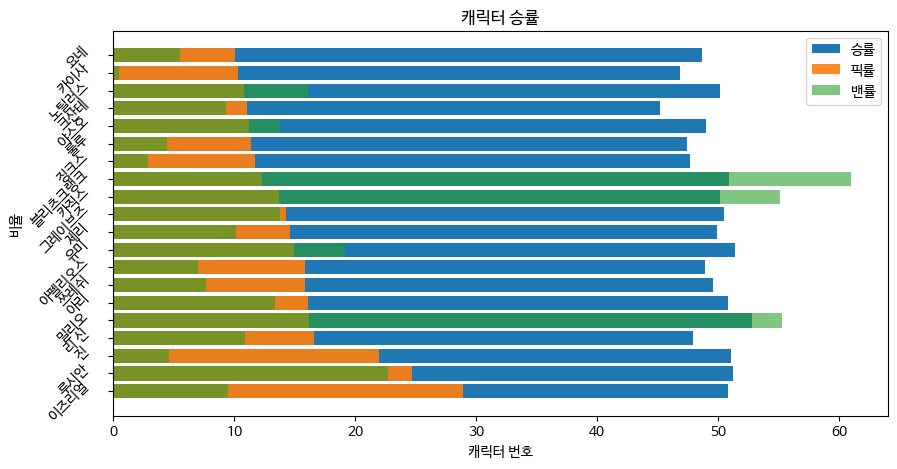

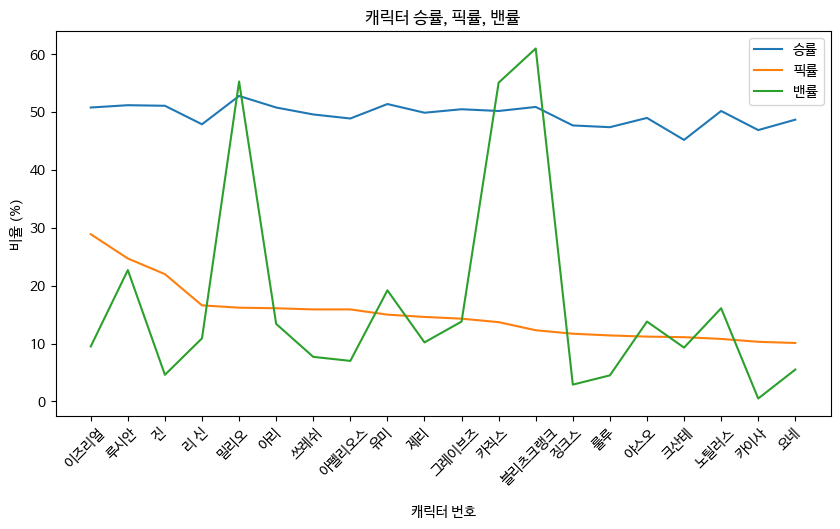

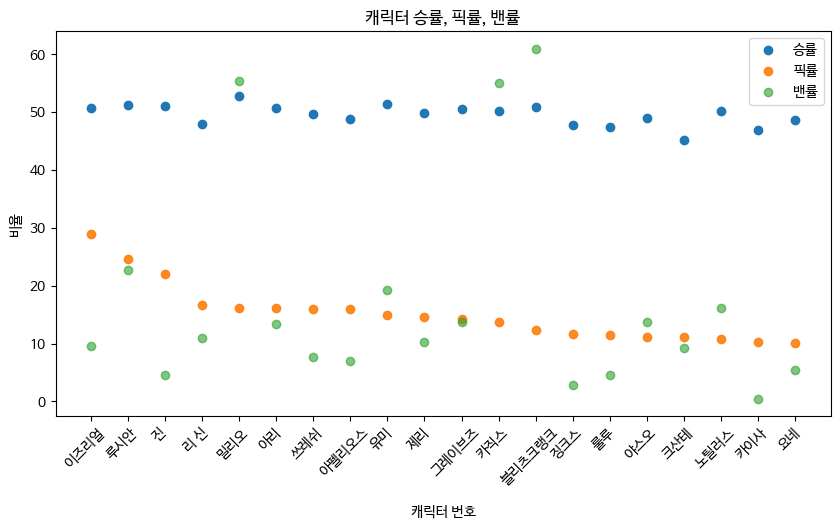

In [2]:
import urllib.request
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

url = 'https://fow.kr/stats'
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html, 'html.parser')

character_positions = soup.findAll("td", attrs={"class": "td_pos"})
character_names = soup.findAll("a", attrs={"class":"champ_link"})
character_rates = soup.findAll("td", attrs={"class" : "td_rate"})

win_rates = []
pick_rates = []
ban_rates = []
character_labels = []

for i in range(20):
    name = character_names[i].text
    parsed_name = re.sub(r"\n+\s+", "", name)
    win_rate = float(character_rates[i * 6].text.replace("%", ""))
    pick_rate = float(character_rates[i * 6 + 1].text.replace("%", ""))
    ban_rate = float(character_rates[i * 6 + 2].text.replace("%", ""))
    
    win_rates.append(win_rate)
    pick_rates.append(pick_rate)
    ban_rates.append(ban_rate)
    character_labels.append(parsed_name)

# 막대그래프
x = range(1, 21)
plt.figure(figsize=(10, 5))
plt.barh(x, win_rates, label='승률')
plt.barh(x, pick_rates, label='픽률', alpha=0.9)
plt.barh(x, ban_rates, label='밴률', alpha=0.6)
plt.xlabel('캐릭터 번호')
plt.ylabel('비율')
plt.title('캐릭터 승률, 픽률, 밴률')
plt.legend()
plt.yticks(x, character_labels, rotation=45)
plt.show()

# 선그래프
plt.figure(figsize=(10, 5))
plt.plot(x, win_rates, label='승률')
plt.plot(x, pick_rates, label='픽률')
plt.plot(x, ban_rates, label='밴률')
plt.xlabel('캐릭터 번호')
plt.ylabel('비율 (%)')
plt.title('캐릭터 승률, 픽률, 밴률')
plt.legend()
plt.xticks(x, character_labels, rotation=45)
plt.show()

# 산점
plt.figure(figsize=(10, 5))
plt.scatter(x, win_rates, label='승률')
plt.scatter(x, pick_rates, label='픽률', alpha=0.9)
plt.scatter(x, ban_rates, label='밴률', alpha=0.6)
plt.xlabel('캐릭터 번호')
plt.ylabel('비율')
plt.title('캐릭터 승률, 픽률, 밴률')
plt.legend()
plt.xticks(x, character_labels, rotation=45)
plt.show()